In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('Data - SDG Sentiment Scores.csv')
df.head()

,TimeStamp,Stock Name,Stock Ticker,Sector,Daily SDG Sentiment Score,Daily SDG Sentiment Volume,Daily SDG Sentiment Insight,Weekly SDG Sentiment Score,Weekly SDG Sentiment Volume,Weekly SDG Sentiment Insight
0,2/17/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
1,2/18/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
2,2/19/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
3,2/20/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
4,2/21/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639100 entries, 0 to 639099
Data columns (total 10 columns):
TimeStamp                       639100 non-null object
Stock Name                      639100 non-null object
Stock Ticker                    639100 non-null object
Sector                          622600 non-null object
Daily SDG Sentiment Score       639100 non-null float64
Daily SDG Sentiment Volume      639100 non-null int64
Daily SDG Sentiment Insight     639100 non-null float64
Weekly SDG Sentiment Score      639100 non-null float64
Weekly SDG Sentiment Volume     639100 non-null float64
Weekly SDG Sentiment Insight    639100 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 48.8+ MB


In [4]:
df.columns = ['TimeStamp', 'StockName', 'StockTicker', 'Sector', 'Daily_SDG_SS', 'Daily_SDG_SV', 'Daily_SDG_SI', 'Weekly_SDG_SS',  'Weekly_SDG_SV',  'Weekly_SDG_SI']
df.head()

,TimeStamp,StockName,StockTicker,Sector,Daily_SDG_SS,Daily_SDG_SV,Daily_SDG_SI,Weekly_SDG_SS,Weekly_SDG_SV,Weekly_SDG_SI
0,2/17/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
1,2/18/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
2,2/19/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
3,2/20/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0
4,2/21/2015,Alcoa Corporation,AA,Basic Industries,0.0,0,0.0,0.0,0.0,0.0


In [5]:
stock_num = dict(df['StockName'].value_counts())
len(stock_num)

581

In [6]:
# Check the missing data in each columns
df.isnull().any()

TimeStamp        False
StockName        False
StockTicker      False
Sector            True
Daily_SDG_SS     False
Daily_SDG_SV     False
Daily_SDG_SI     False
Weekly_SDG_SS    False
Weekly_SDG_SV    False
Weekly_SDG_SI    False
dtype: bool

In [7]:
sector_num = dict(df['Sector'].value_counts())
len(sector_num)

17

In [8]:
# Find number of missing values in Sector
count = 0
for i in df['Sector'].isnull():
    if i:
        count += 1
count

16500

In [9]:
# Fill missing values using other
df['Sector']

0          Basic Industries
1          Basic Industries
2          Basic Industries
3          Basic Industries
4          Basic Industries
5          Basic Industries
6          Basic Industries
7          Basic Industries
8          Basic Industries
9          Basic Industries
10         Basic Industries
11         Basic Industries
12         Basic Industries
13         Basic Industries
14         Basic Industries
15         Basic Industries
16         Basic Industries
17         Basic Industries
18         Basic Industries
19         Basic Industries
20         Basic Industries
21         Basic Industries
22         Basic Industries
23         Basic Industries
24         Basic Industries
25         Basic Industries
26         Basic Industries
27         Basic Industries
28         Basic Industries
29         Basic Industries
                ...        
639070    Consumer Services
639071    Consumer Services
639072    Consumer Services
639073    Consumer Services
639074    Consumer S

In [10]:
df['Sector'] = df['Sector'].fillna(value = 'Other')
df.isnull().any()

TimeStamp        False
StockName        False
StockTicker      False
Sector           False
Daily_SDG_SS     False
Daily_SDG_SV     False
Daily_SDG_SI     False
Weekly_SDG_SS    False
Weekly_SDG_SV    False
Weekly_SDG_SI    False
dtype: bool

In [11]:
# Store the dataset into a SQL database
import sqlite3
engine = sqlite3.connect('DB')
df.to_sql(name = 'dataset_sql', if_exists = 'replace', con = engine, index = False)

In [12]:
time_series_df = pd.read_sql_query('''SELECT TimeStamp, AVG(Daily_SDG_SS), AVG(Daily_SDG_SV), AVG(Daily_SDG_SI),
                                             AVG(Weekly_SDG_SS), AVG(Weekly_SDG_SV), AVG(Weekly_SDG_SI)
                                      FROM dataset_sql
                                      GROUP BY TimeStamp''', engine)

In [13]:
time_series_df

,TimeStamp,AVG(Daily_SDG_SS),AVG(Daily_SDG_SV),AVG(Daily_SDG_SI),AVG(Weekly_SDG_SS),AVG(Weekly_SDG_SV),AVG(Weekly_SDG_SI)
0,1/1/2016,-0.215955,1.364888,0.000000,0.014871,2.831704,0.000000
1,1/1/2017,0.246472,1.163511,0.000000,-0.075129,3.002840,0.000000
2,1/1/2018,0.313546,0.874355,0.000000,0.222840,3.026816,0.000000
3,1/10/2016,-0.077917,1.218589,0.000000,-0.016162,2.907900,0.000000
4,1/10/2017,1.038210,2.368330,0.266781,0.378606,3.225387,0.266781
5,1/10/2018,-0.152960,1.416523,0.266781,0.214923,3.320620,0.266781
6,1/11/2016,0.531997,1.919105,-1.000000,0.119294,2.939277,-1.000000
7,1/11/2017,0.858055,2.247849,0.266781,0.465972,3.251222,0.266781
8,1/11/2018,0.185611,1.309811,0.266781,0.183098,3.334165,0.266781
9,1/12/2016,0.524664,1.922547,0.266781,0.208451,2.957384,0.266781


In [14]:
time_series_df.TimeStamp = pd.to_datetime(time_series_df.TimeStamp)
time_series_df.set_index('TimeStamp', inplace = True)

In [15]:
time_series_df

,AVG(Daily_SDG_SS),AVG(Daily_SDG_SV),AVG(Daily_SDG_SI),AVG(Weekly_SDG_SS),AVG(Weekly_SDG_SV),AVG(Weekly_SDG_SI)
TimeStamp,,,,,,
2016-01-01,-0.215955,1.364888,0.000000,0.014871,2.831704,0.000000
2017-01-01,0.246472,1.163511,0.000000,-0.075129,3.002840,0.000000
2018-01-01,0.313546,0.874355,0.000000,0.222840,3.026816,0.000000
2016-01-10,-0.077917,1.218589,0.000000,-0.016162,2.907900,0.000000
2017-01-10,1.038210,2.368330,0.266781,0.378606,3.225387,0.266781
2018-01-10,-0.152960,1.416523,0.266781,0.214923,3.320620,0.266781
2016-01-11,0.531997,1.919105,-1.000000,0.119294,2.939277,-1.000000
2017-01-11,0.858055,2.247849,0.266781,0.465972,3.251222,0.266781
2018-01-11,0.185611,1.309811,0.266781,0.183098,3.334165,0.266781


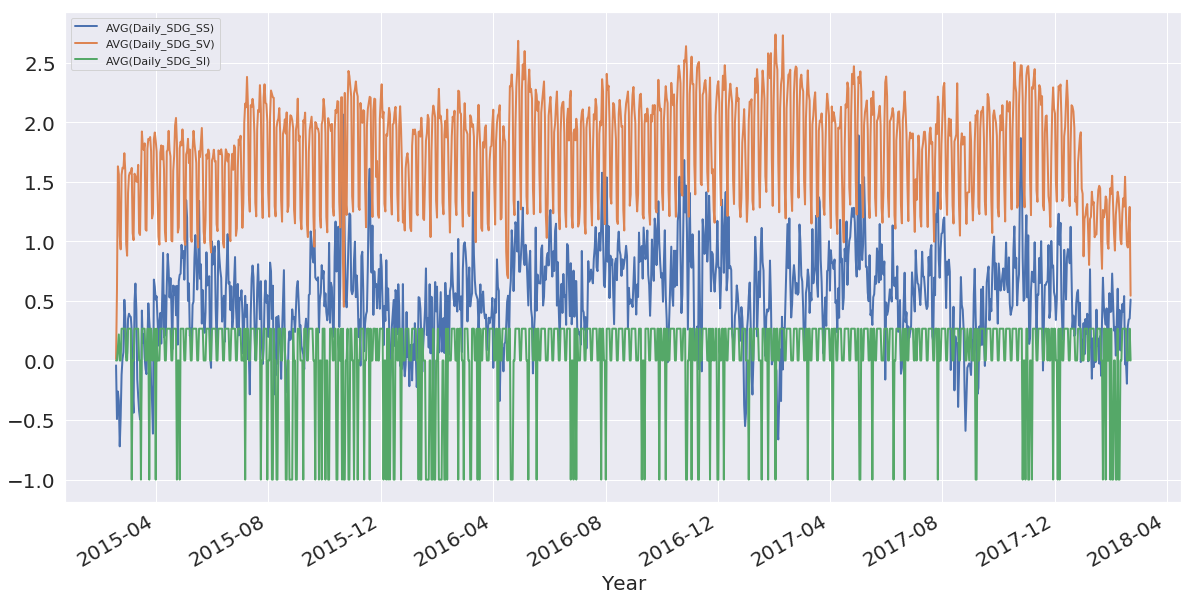

In [16]:
time_series_df[['AVG(Daily_SDG_SS)', 'AVG(Daily_SDG_SV)', 'AVG(Daily_SDG_SI)']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

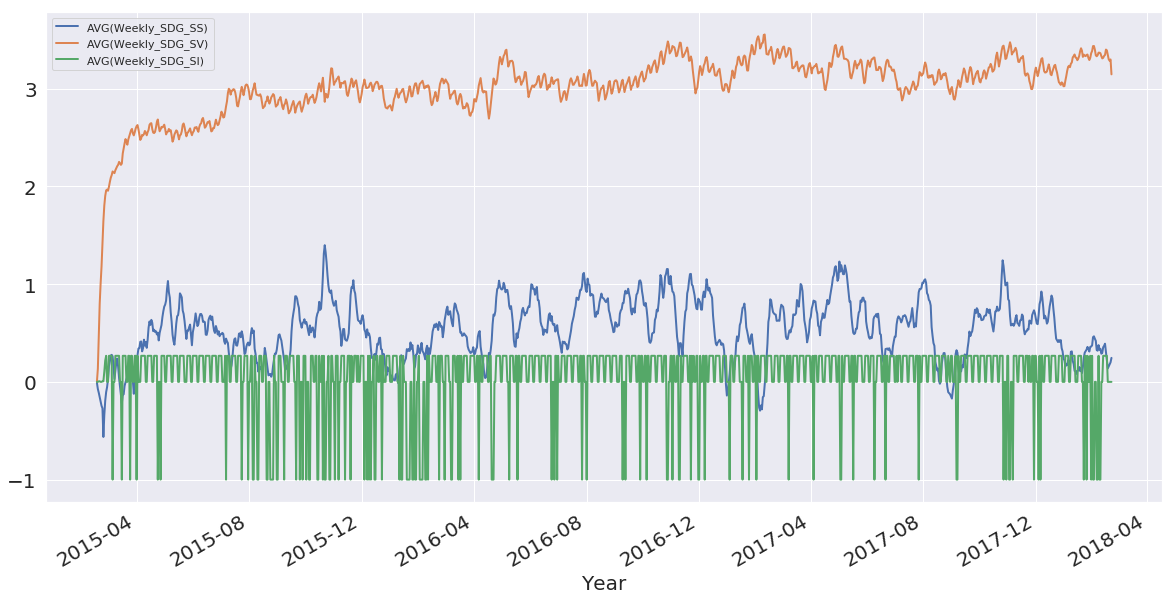

In [17]:
time_series_df[['AVG(Weekly_SDG_SS)', 'AVG(Weekly_SDG_SV)', 'AVG(Weekly_SDG_SI)']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

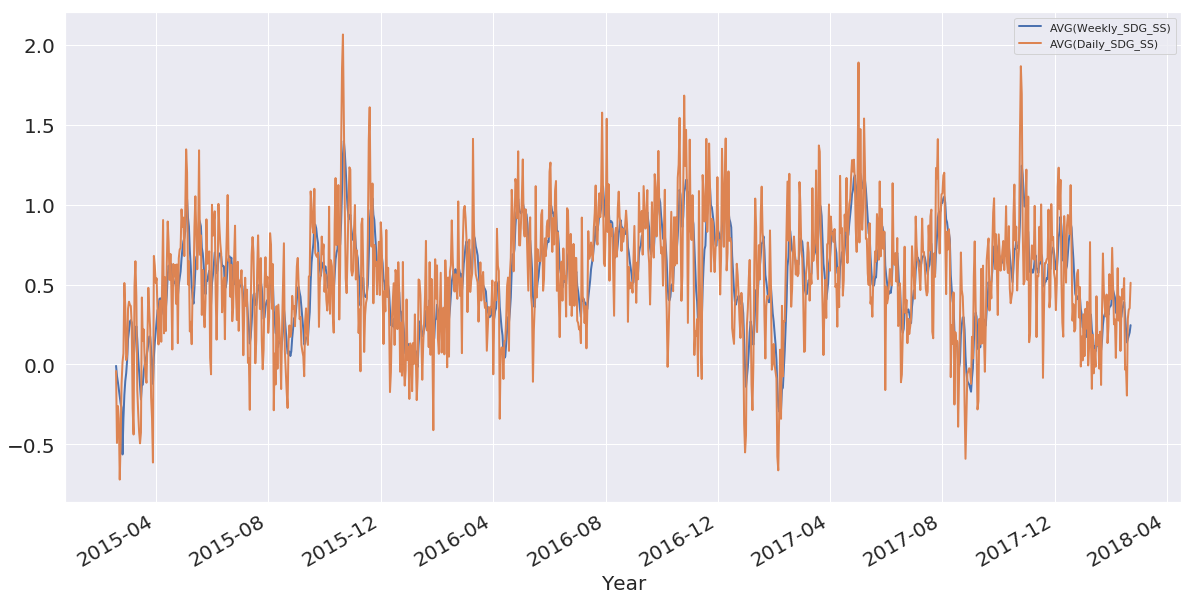

In [18]:
time_series_df[['AVG(Weekly_SDG_SS)', 'AVG(Daily_SDG_SS)']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

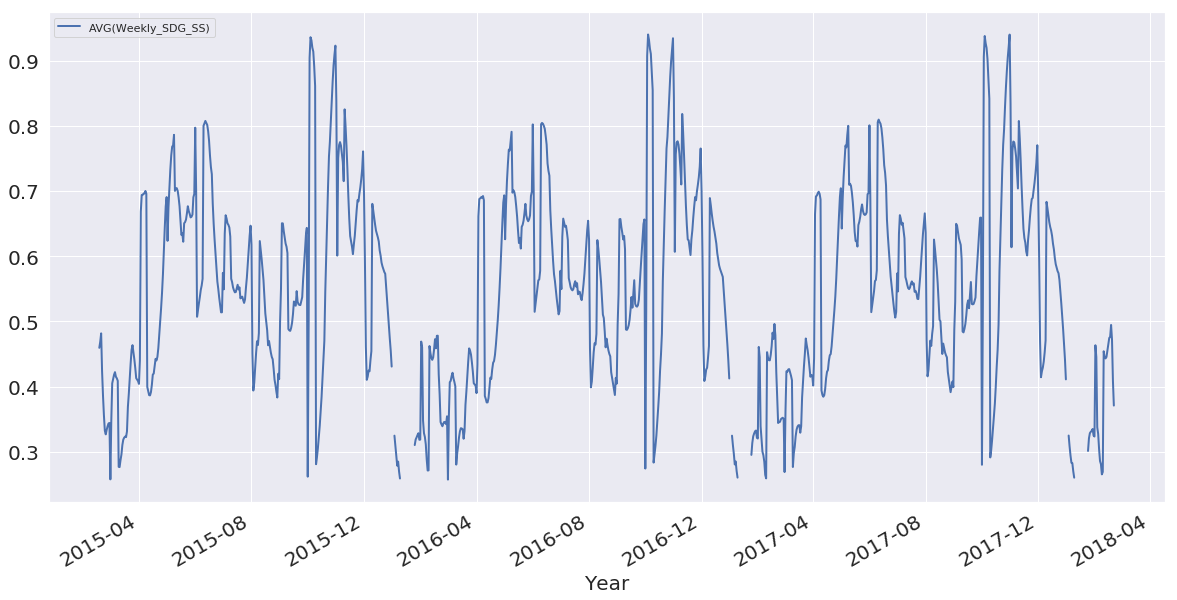

In [19]:
Weekly_SDG_SS_avg = time_series_df[['AVG(Weekly_SDG_SS)']]
Weekly_SDG_SS_avg.rolling(50).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

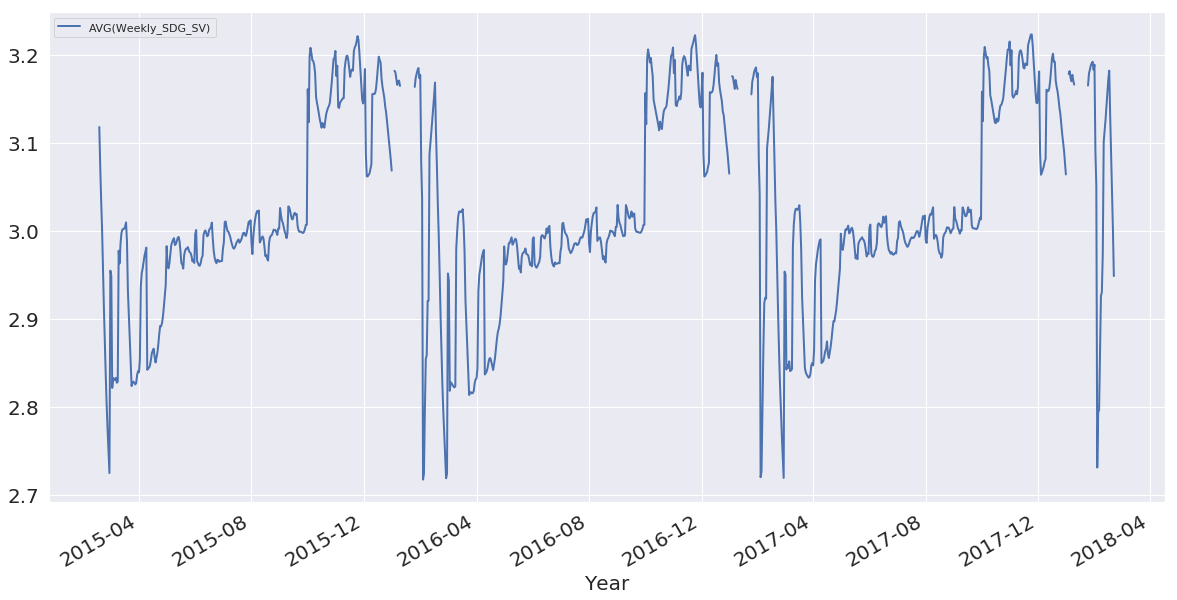

In [20]:
Weekly_SDG_SV_avg = time_series_df[['AVG(Weekly_SDG_SV)']]
Weekly_SDG_SV_avg.rolling(50).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

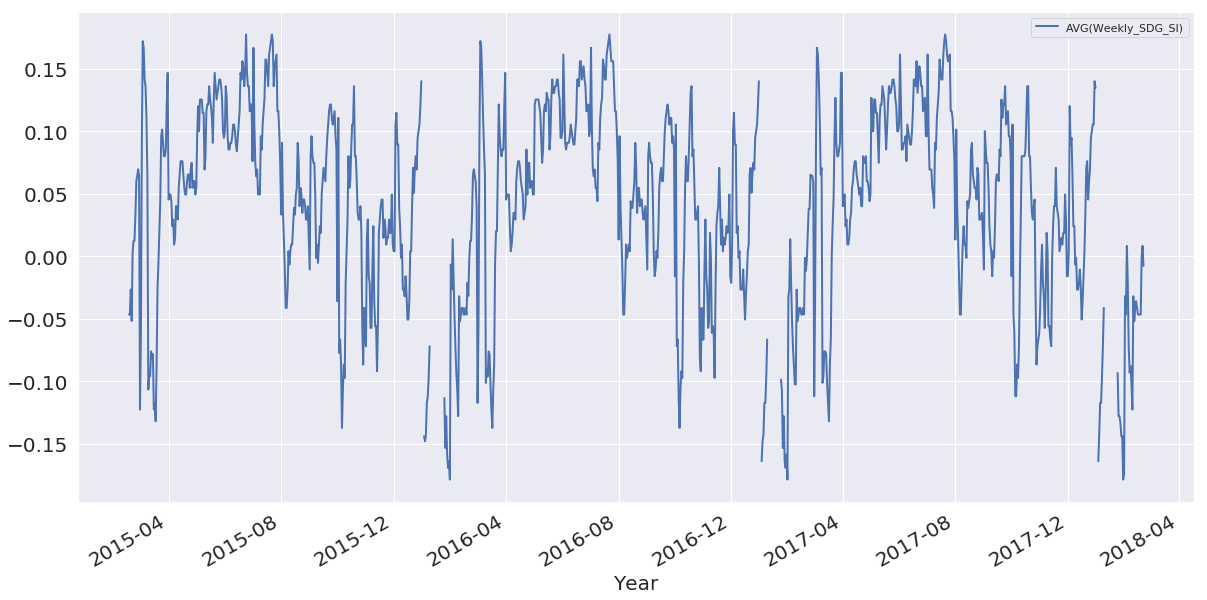

In [21]:
Weekly_SDG_SI_avg = time_series_df[['AVG(Weekly_SDG_SI)']]
Weekly_SDG_SI_avg.rolling(50).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

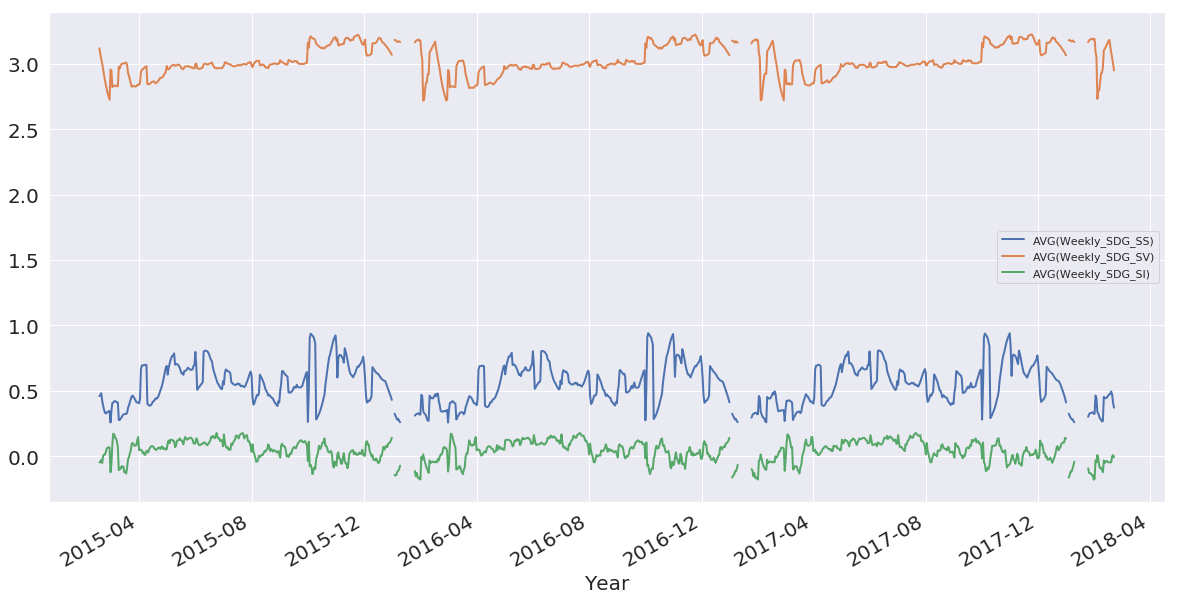

In [22]:
df_rm = pd.concat([Weekly_SDG_SS_avg.rolling(50).mean(), Weekly_SDG_SV_avg.rolling(50).mean(), Weekly_SDG_SI_avg.rolling(50).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

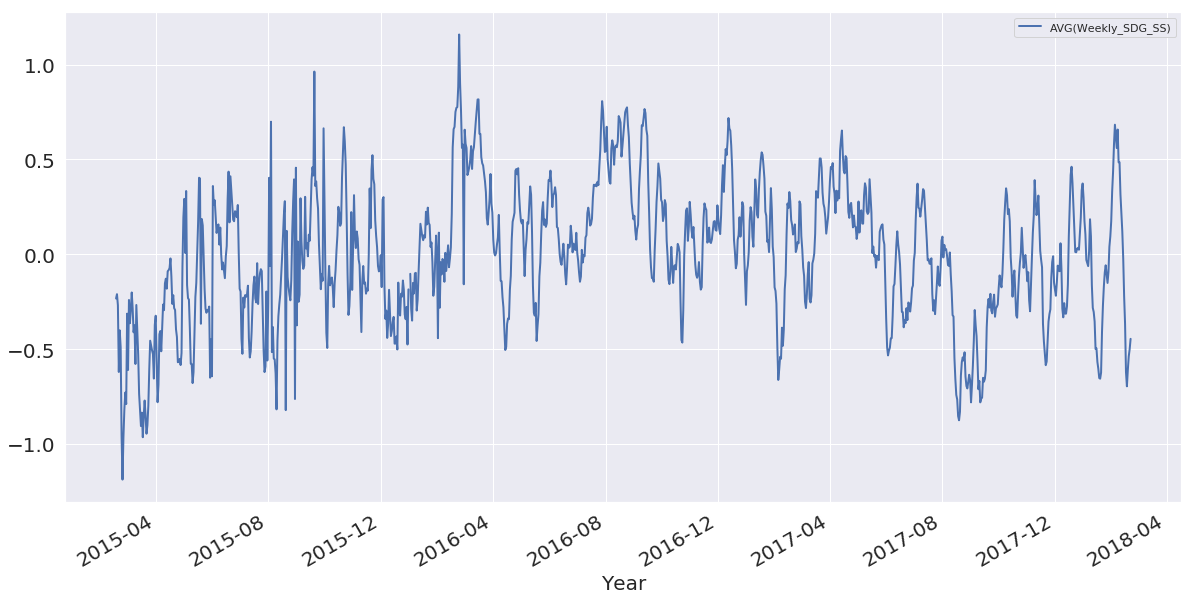

In [23]:
Weekly_SDG_SS_avg.diff().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [24]:
time_series_df.corr()

,AVG(Daily_SDG_SS),AVG(Daily_SDG_SV),AVG(Daily_SDG_SI),AVG(Weekly_SDG_SS),AVG(Weekly_SDG_SV),AVG(Weekly_SDG_SI)
AVG(Daily_SDG_SS),1.000000,0.369068,0.048472,0.767505,0.257776,0.052690
AVG(Daily_SDG_SV),0.369068,1.000000,0.027885,0.269843,0.330565,0.029526
AVG(Daily_SDG_SI),0.048472,0.027885,1.000000,0.035340,-0.020703,0.999139
AVG(Weekly_SDG_SS),0.767505,0.269843,0.035340,1.000000,0.351344,0.043065
AVG(Weekly_SDG_SV),0.257776,0.330565,-0.020703,0.351344,1.000000,-0.008732
AVG(Weekly_SDG_SI),0.052690,0.029526,0.999139,0.043065,-0.008732,1.000000


In [25]:
statistic_df = pd.read_sql_query('''SELECT StockName, AVG(Daily_SDG_SS), AVG(Daily_SDG_SV), AVG(Daily_SDG_SI),
                                             AVG(Weekly_SDG_SS), AVG(Weekly_SDG_SV), AVG(Weekly_SDG_SI)
                                      FROM dataset_sql
                                      GROUP BY StockName''', engine)

In [26]:
statistic_df

,StockName,AVG(Daily_SDG_SS),AVG(Daily_SDG_SV),AVG(Daily_SDG_SI),AVG(Weekly_SDG_SS),AVG(Weekly_SDG_SV),AVG(Weekly_SDG_SI)
0,"ABIOMED, Inc.",1.351073,1.397273,0.081909,1.315691,2.836845,0.072455
1,AECOM,-0.977809,0.001818,-0.113636,-0.959645,0.583000,-0.113636
2,AGCO Corporation,1.182300,0.149091,0.019000,1.189473,1.821509,0.019091
3,AMC Networks Inc.,0.066373,0.000909,-0.113636,0.065991,0.946045,-0.113636
4,"AMERIPRISE FINANCIAL SERVICES, INC.",1.777455,0.003636,0.017455,1.766109,1.704818,0.021909
5,"AMTEK, Inc.",1.144991,0.004545,-0.098364,1.137927,0.958773,-0.099000
6,"ANSYS, Inc.",5.052864,1.683636,0.199909,5.028300,2.574745,0.283000
7,ARRIS International plc,0.738918,0.090909,-0.019545,0.730155,1.069655,-0.021545
8,AbbVie Inc.,-2.151100,3.870000,-0.032909,-2.147218,4.219700,-0.093000
9,"Acadia Healthcare Company, Inc.",1.935400,0.011818,0.034727,1.918209,2.137864,0.060000


In [27]:
statistic_df.describe()

,AVG(Daily_SDG_SS),AVG(Daily_SDG_SV),AVG(Daily_SDG_SI),AVG(Weekly_SDG_SS),AVG(Weekly_SDG_SV),AVG(Weekly_SDG_SI)
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,0.544676,1.769238,0.038964,0.541857,3.025559,0.037773
std,5.246423,4.271788,0.086511,5.233678,4.009893,0.098225
min,-63.411500,0.000909,-0.113636,-63.432473,0.039673,-0.113636
25%,-0.148255,0.095455,-0.015636,-0.142300,1.672100,-0.033727
50%,1.100900,0.399091,0.037636,1.090527,2.128109,0.035182
75%,2.332582,1.551818,0.087273,2.323818,2.900564,0.094364
max,14.097491,45.492727,0.374545,14.046545,45.420664,0.379818


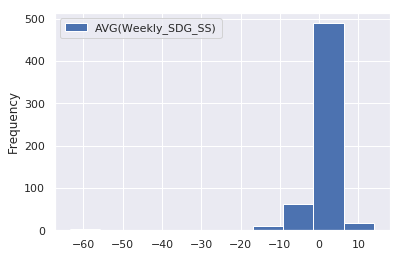

In [34]:
statistic_df[['AVG(Weekly_SDG_SS)']].plot(kind = 'hist')

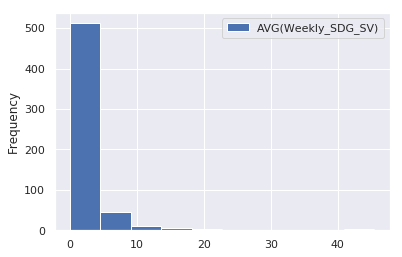

In [35]:
statistic_df[['AVG(Weekly_SDG_SV)']].plot(kind = 'hist')

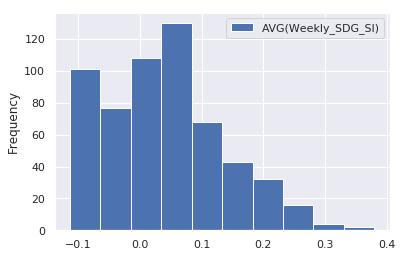

In [36]:
statistic_df[['AVG(Weekly_SDG_SI)']].plot(kind = 'hist')